In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("drug_consumption.csv")
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [3]:
#Source: https://drugs.laws.com/list-of-illegal-drugs
#Grouping Illegal and Non-Illegal drugs
illegal_drugs = ['Amphet','Coke','Crack','Ecstacy','Heroin','LSD','Mushrooms']
Non_illegal =[i for i in data.columns[13:] if i not in illegal_drugs]

In [4]:
#Stripping all 'CL' from all the drug columns
for drug in data.columns[13:]:
        data[drug] = data[drug].map(lambda x: int(str(x).lstrip('CL')))

In [5]:
#Start with Clusters
#Cluster1: Using all the columns
#Cluster1 with Hierarchial clustering single linkage

In [6]:
variables = data.columns
var_indices = [data.columns.get_loc(variable) for variable in variables]

In [7]:
print(var_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [8]:
#Standardizing the data
x = data.iloc[:,var_indices]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [9]:
clustering = linkage(x_scaled,method="single",metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[1 1 1 ... 1 1 1]


In [10]:
data['clusters'] = clusters

In [11]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.5079507583610615


In [12]:
#Cluster1 with Hierarchial clustering Complete Linkage

In [13]:
clustering = linkage(x_scaled,method="complete",metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[1 1 1 ... 1 1 1]


In [14]:
data['clusters'] = clusters

In [15]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.6629990546490399


[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

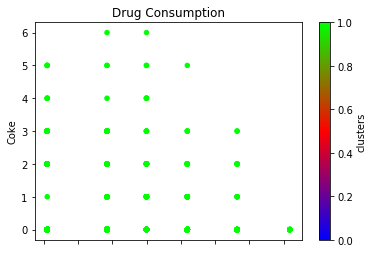

In [16]:
ax = data.plot(kind = 'scatter', x = 'Age', y = 'Crack', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

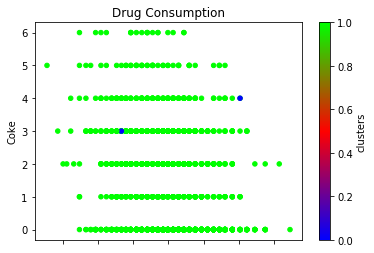

In [17]:
ax = data.plot(kind = 'scatter', x = 'Ascore', y = 'Coke', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

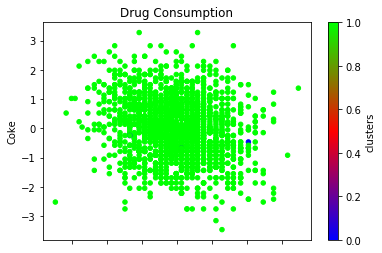

In [18]:
ax = data.plot(kind = 'scatter', x = 'Ascore', y = 'Nscore', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

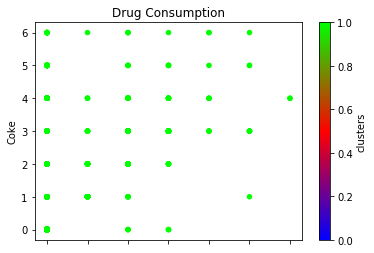

In [19]:
ax = data.plot(kind = 'scatter', x = 'Crack', y = 'Coke', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

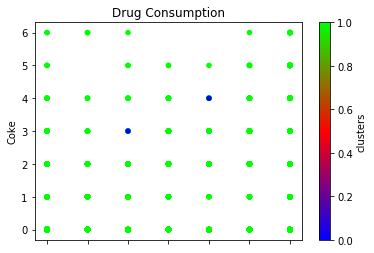

In [20]:
ax = data.plot(kind = 'scatter', x = 'Nicotine', y = 'Coke', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

In [21]:
#Cluster1 with K-Means

In [22]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 0).fit(x_scaled)
clusters = clustering.labels_
print(clusters)
data['clusters'] = clusters

[0 1 0 ... 1 1 1]


In [23]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.18301116784616245


In [24]:
#Cluster1 with DBSCAN

In [25]:
clustering = DBSCAN(eps = 2, min_samples = 4, metric = "euclidean").fit(x_scaled) 
clusters = clustering.labels_
data['clusters'] = clusters

In [26]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

-0.1898724108691829


In [27]:
# print(metrics.adjusted_rand_score(data['clusters']))
# We cannot use rand index cause we do not have anything to compare the clusters against

In [28]:
#Cluster2: Using only Non-illegal drugs

In [29]:
variables = Non_illegal
var_indices = [data.columns.get_loc(variable) for variable in variables]

In [30]:
#Standardizing the data
x = data.iloc[:,var_indices]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [31]:
clustering = linkage(x_scaled,method="single",metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[0 0 0 ... 0 0 0]


In [32]:
data['clusters'] = clusters

In [33]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.8233760416358061


[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

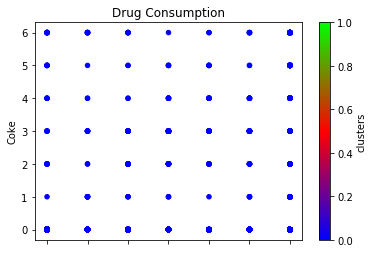

In [34]:
ax = data.plot(kind = 'scatter', x = 'Nicotine', y = 'Meth', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

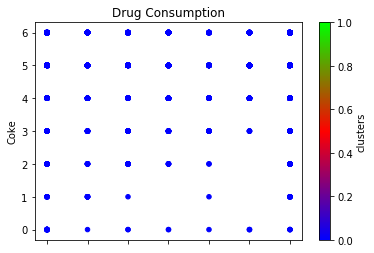

In [35]:
ax = data.plot(kind = 'scatter', x = 'Nicotine', y = 'Alcohol', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

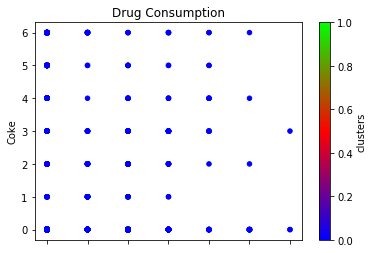

In [36]:
ax = data.plot(kind = 'scatter', x = 'Amyl', y = 'Meth', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

In [37]:
#Cluster2 with complete Linkage

In [38]:
clustering = linkage(x_scaled,method="complete",metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[1 1 1 ... 1 1 1]


In [39]:
data['clusters'] = clusters

In [40]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.7931811284335685


In [41]:
#Cluster2 with K-Means

In [42]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 0).fit(x_scaled)
clusters = clustering.labels_
print(clusters)
data['clusters'] = clusters

[0 1 0 ... 1 1 1]


In [43]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.22503062682481748


In [44]:
#Cluster2 with DBSCAN

In [45]:
clustering = DBSCAN(eps = 2, min_samples = 3, metric = "euclidean").fit(x_scaled)
clusters = clustering.labels_
data['clusters'] = clusters

In [46]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.09401786652049447


In [47]:
#Cluster3: Using only Illegal drugs

In [48]:
variables = illegal_drugs
var_indices = [data.columns.get_loc(variable) for variable in variables]
print(var_indices)

[14, 20, 21, 22, 23, 26, 28]


In [49]:
#Standardizing the data
x = data.iloc[:,var_indices]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [50]:
#Cluster3 using Hierarchial clustering Single Linkage
clustering = linkage(x_scaled,method="single",metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[0 0 0 ... 0 0 0]


In [51]:
data['clusters'] = clusters

In [52]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.6082079307311252


[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

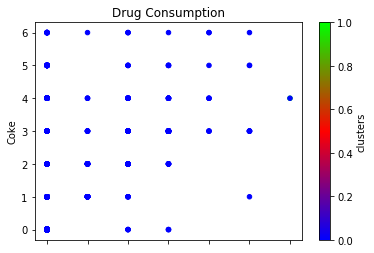

In [53]:
ax = data.plot(kind = 'scatter', x = 'Crack', y = 'Coke', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

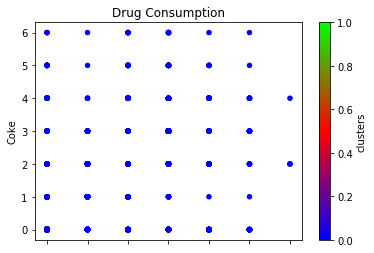

In [54]:
ax = data.plot(kind = 'scatter', x = 'Mushrooms', y = 'Coke', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

In [55]:
#Cluster3 using Hierarchial clustering Complete Linkage

In [56]:
clustering = linkage(x_scaled,method="complete",metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[1 1 1 ... 1 1 1]


In [57]:
data['clusters'] = clusters

In [58]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.5415889060633275


In [59]:
#Cluster3 with K-Means

In [60]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 0).fit(x_scaled)
clusters = clustering.labels_
print(clusters)
data['clusters'] = clusters

[0 1 0 ... 1 1 1]


In [61]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.4487703444541595


In [62]:
#Cluster3 with DBSCAN

In [63]:
clustering = DBSCAN(eps = 2, min_samples = 3, metric = "euclidean").fit(x_scaled)
clusters = clustering.labels_
data['clusters'] = clusters

In [64]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.5160039017438653


In [65]:
#cluster4: Using only the drugs

In [66]:
variables = illegal_drugs + Non_illegal
var_indices = [data.columns.get_loc(variable) for variable in variables]
print(var_indices)

[14, 20, 21, 22, 23, 26, 28, 13, 15, 16, 17, 18, 19, 24, 25, 27, 29, 30, 31]


In [67]:
#Standardizing the data
x = data.iloc[:,var_indices]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [68]:
clustering = linkage(x_scaled,method="single",metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[0 0 0 ... 0 0 0]


In [69]:
data['clusters'] = clusters

In [70]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.7799966615627284


[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

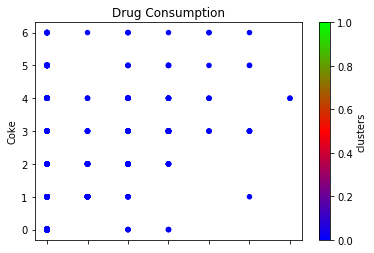

In [71]:
ax = data.plot(kind = 'scatter', x = 'Crack', y = 'Coke', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

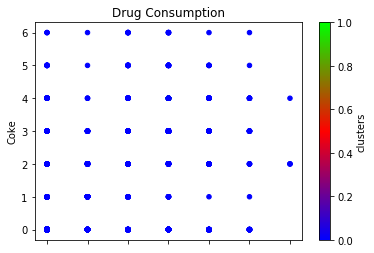

In [72]:
ax = data.plot(kind = 'scatter', x = 'Mushrooms', y = 'Coke', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

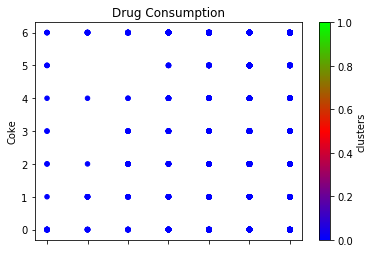

In [73]:
ax = data.plot(kind = 'scatter', x = 'Alcohol', y = 'Nicotine', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

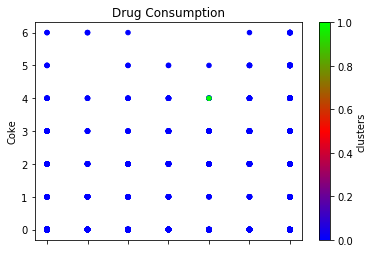

In [74]:
ax = data.plot(kind = 'scatter', x = 'Nicotine', y = 'Coke', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

In [75]:
#Cluster4 using Hierarchial clustering Complete Linkage

In [76]:
clustering = linkage(x_scaled,method="complete",metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[1 1 1 ... 1 1 1]


In [77]:
data['clusters'] = clusters

In [78]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.7432570016576694


In [79]:
#Cluster4 with K-Means

In [80]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 0).fit(x_scaled)
clusters = clustering.labels_
print(clusters)
data['clusters'] = clusters

[0 1 0 ... 1 1 1]


In [81]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.2684663279061382


In [82]:
#Cluster4 with DBSCAN

In [83]:
clustering = DBSCAN(eps = 2, min_samples = 3, metric = "euclidean").fit(x_scaled)
clusters = clustering.labels_
data['clusters'] = clusters

In [84]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

-0.06633855889724637


In [85]:
#Cluster5: Not using any drugs

In [86]:
variables = data.columns[0:13]
var_indices = [data.columns.get_loc(variable) for variable in variables]
print(var_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [87]:
#Standardizing the data
x = data.iloc[:,var_indices]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [88]:
#Cluster5 with Hierarchial clustering with Single Linkage

In [89]:
clustering = linkage(x_scaled,method='single',metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[0 0 0 ... 0 0 0]


In [90]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

-0.21114670320992815


In [91]:
#Cluster5 with Hierarchial Clustering with Complete Linkage

In [92]:
clustering = linkage(x_scaled,method='complete',metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[1 1 1 ... 1 1 1]


In [93]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

-0.21114670320992815


In [94]:
#Cluster 5 with K-Means

In [95]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 0).fit(x_scaled)
clusters = clustering.labels_
print(clusters)
data['clusters'] = clusters

[0 0 0 ... 1 1 1]


In [96]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.15804112591503822


[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

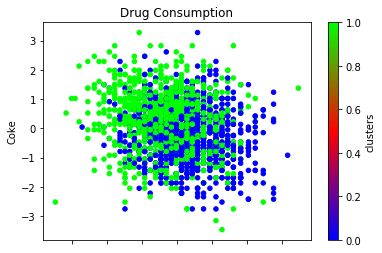

In [97]:
ax = data.plot(kind = 'scatter', x = 'Ascore', y = 'Nscore', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

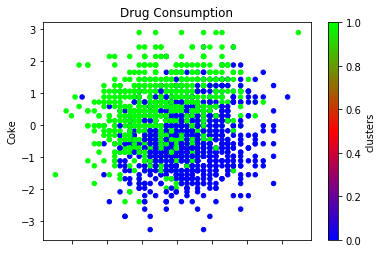

In [98]:
ax = data.plot(kind = 'scatter', x = 'Ascore', y = 'Oscore', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

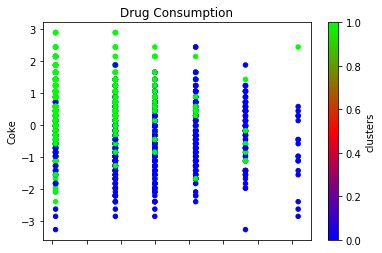

In [99]:
ax = data.plot(kind = 'scatter', x = 'Age', y = 'Oscore', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

In [100]:
#Cluster5 with DBSCAN

In [101]:
clustering = DBSCAN(eps = 2, min_samples = 3, metric = "euclidean").fit(x_scaled)
clusters = clustering.labels_
data['clusters'] = clusters

In [102]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

-0.11510965619210076


In [103]:
#Cluster6: Using Personality traits

In [104]:
variables = data.columns[6:13]
var_indices = [data.columns.get_loc(variable) for variable in variables]
print(var_indices)

[6, 7, 8, 9, 10, 11, 12]


In [105]:
#Standardizing the data
x = data.iloc[:,var_indices]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [106]:
#Cluster6 with Hierarchial clustering with Single Linkage

In [107]:
clustering = linkage(x_scaled,method="single",metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[0 0 0 ... 0 0 0]


In [108]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

-0.32290072471567954


In [109]:
#Cluster6 with Hierarchial Clustering with Complete Linkage

In [110]:
clustering = linkage(x_scaled,method='complete',metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[1 1 0 ... 0 0 1]


In [111]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

-0.32290072471567954


In [112]:
#Cluster6 with K-Means

In [113]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 0).fit(x_scaled)
clusters = clustering.labels_
print(clusters)
data['clusters'] = clusters

[1 1 1 ... 0 0 0]


[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

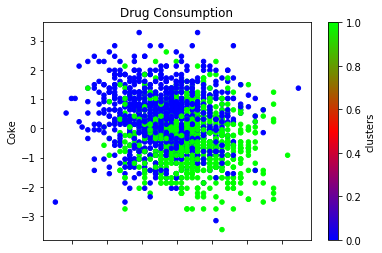

In [114]:
ax = data.plot(kind = 'scatter', x = 'Ascore', y = 'Nscore', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

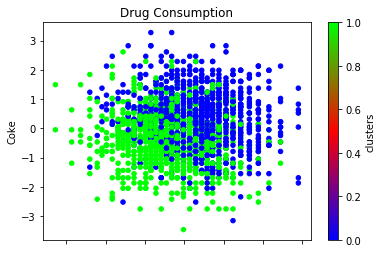

In [115]:
ax = data.plot(kind = 'scatter', x = 'Oscore', y = 'Nscore', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

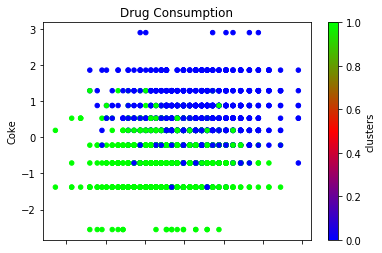

In [116]:
ax = data.plot(kind = 'scatter', x = 'Oscore', y = 'Impulsive', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

In [117]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.1898276389135005


In [118]:
#Cluster6 with DBSCAN

In [119]:
clustering = DBSCAN(eps = 2, min_samples = 3, metric = "euclidean").fit(x_scaled)
clusters = clustering.labels_
data['clusters'] = clusters

In [120]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.3122595933194069


In [121]:
#Cluster7: Using Personality traits and Non_illegal drugs

In [122]:
variables = Non_illegal
var_indices = [data.columns.get_loc(variable) for variable in variables] + [6,7,8,9,10,11,12]
print(var_indices)

[13, 15, 16, 17, 18, 19, 24, 25, 27, 29, 30, 31, 6, 7, 8, 9, 10, 11, 12]


In [123]:
#Standardizing the data
x = data.iloc[:,var_indices]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [124]:
#Cluster7 with Hierarchial Clustering with Single Linkage

In [125]:
clustering = linkage(x_scaled,method="single",metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[0 0 0 ... 0 0 0]


In [126]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.2200681697633267


[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

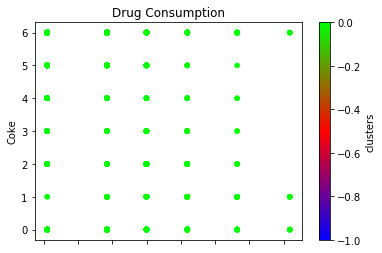

In [127]:
ax = data.plot(kind = 'scatter', x = 'Age', y = 'Nicotine', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

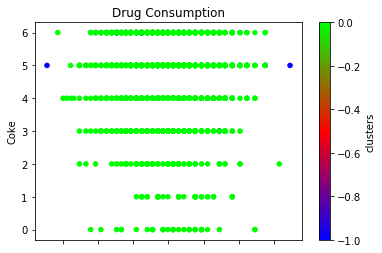

In [128]:
ax = data.plot(kind = 'scatter', x = 'Ascore', y = 'Alcohol', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

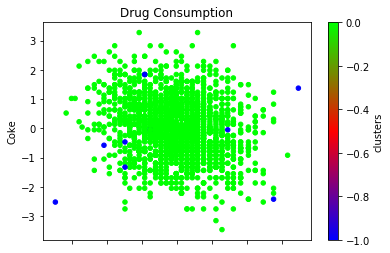

In [129]:
ax = data.plot(kind = 'scatter', x = 'Ascore', y = 'Nscore', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

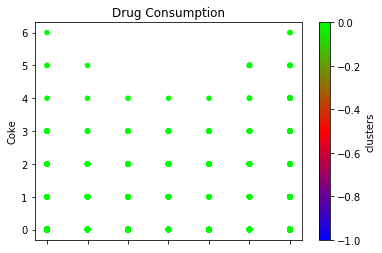

In [130]:
ax = data.plot(kind = 'scatter', x = 'Nicotine', y = 'Amyl', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

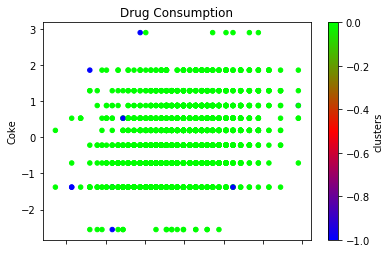

In [131]:
ax = data.plot(kind = 'scatter', x = 'Oscore', y = 'Impulsive', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

In [132]:
#Cluster7 with Hierarchial Clustering with Complete Linkage

In [133]:
clustering = linkage(x_scaled,method='complete',metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[1 1 1 ... 1 1 1]


In [134]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.2200681697633267


In [135]:
#Cluster7 with K-Means

In [136]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 0).fit(x_scaled)
clusters = clustering.labels_
print(clusters)
data['clusters'] = clusters

[0 1 0 ... 1 1 1]


In [137]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.1663782954936895


In [138]:
#Cluster7 with DBSCAN

In [139]:
clustering = DBSCAN(eps = 2, min_samples = 3, metric = "euclidean").fit(x_scaled)
clusters = clustering.labels_
data['clusters'] = clusters

In [140]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

-0.211881563006982


In [141]:
#Cluster8: Using Personality traits and Illegal drugs

In [142]:
variables = illegal_drugs
var_indices = [data.columns.get_loc(variable) for variable in variables] + [6,7,8,9,10,11,12]
print(var_indices)

[14, 20, 21, 22, 23, 26, 28, 6, 7, 8, 9, 10, 11, 12]


In [143]:
#Standardizing the data
x = data.iloc[:,var_indices]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [144]:
#Cluster8 with Hierarchial Clustering with Single Linkage

In [145]:
clustering = linkage(x_scaled,method="single",metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[0 0 0 ... 0 0 0]


In [146]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

-0.2673306540216515


In [147]:
#Cluster8 with Hierarchial Clustering with Complete Linkage

In [148]:
clustering = linkage(x_scaled,method='complete',metric="euclidean")
clusters = fcluster(clustering, 2, criterion = 'maxclust')
clusters = clusters - 1
print(clusters)

[1 1 1 ... 1 1 1]


In [149]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

-0.2673306540216515


In [150]:
#Cluster8 with K-Means

In [151]:
clustering = KMeans(n_clusters = 2, init = 'random', n_init = 1, random_state = 0).fit(x_scaled)
clusters = clustering.labels_
print(clusters)
data['clusters'] = clusters

[0 1 0 ... 1 1 1]


In [152]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

0.2401118477537548


[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

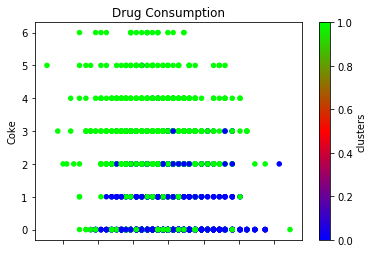

In [153]:
ax = data.plot(kind = 'scatter', x = 'Ascore', y = 'Coke', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

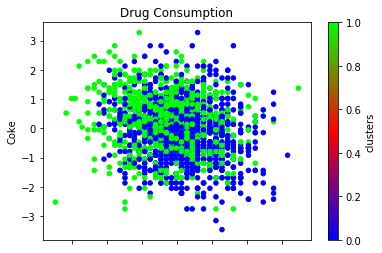

In [154]:
ax = data.plot(kind = 'scatter', x = 'Ascore', y = 'Nscore', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

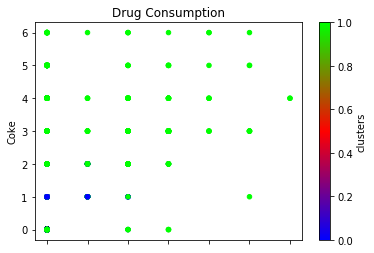

In [155]:
ax = data.plot(kind = 'scatter', x = 'Crack', y = 'Coke', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

[Text(0, 0.5, 'Coke'), Text(0.5, 0, 'Age'), Text(0.5, 1.0, 'Drug Consumption')]

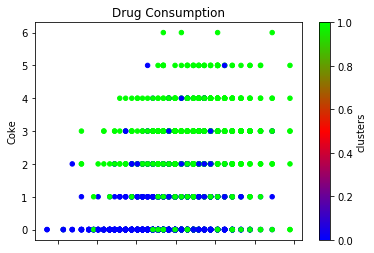

In [156]:
ax = data.plot(kind = 'scatter', x = 'Oscore', y = 'Mushrooms', c = 'clusters', colormap = plt.cm.brg)
ax.set(title = 'Drug Consumption', xlabel = 'Age', ylabel = 'Coke')

In [157]:
#Cluster8 with DBSCAN

In [158]:
clustering = DBSCAN(eps = 2, min_samples = 3, metric = "euclidean").fit(x_scaled)
clusters = clustering.labels_
data['clusters'] = clusters

In [159]:
#Silhouette coefficient
print(metrics.silhouette_score(x_scaled, data['clusters'], metric = "euclidean"))

-0.11209916794288363
